In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

Paramètres de la déformation (en un seul sens)

In [3]:
rect = 200, 120, 0, 0, 0, 0 # Straight image to rectify
quad = 120, 120, 0, 0, 0, 0 # Dimensions to rectify in

wr, hr, ar, br, cr, dr = rect
wq, hq, aq, bq, cq, dq = quad

Dessine une line entre 2 points

Perturbe le champ de vecteurs pour adapter le résultat (doit être en fonction du ratio de la déformation)

In [4]:
def adapt(x):
    return x#-pow(x - 1, 2) + 1

Trouve l'angle du vecteur de direction d'un point, en un point

In [5]:
def find_angle(px, py):
    if(wr==0 or hr==0):
        print("Error")
        return
    p_x = px / wr
    p_y = py / hr
    #p_x = adapt(p_x)
    p_y = adapt(p_y)
    return (45*p_x) + (45*p_y)

Trouve le vecteur de direction opposé à un angle

In [6]:
def find_vector(angle):
    return -1, (1*np.sin(np.deg2rad(angle)))/(np.sin(np.deg2rad(180-(90+angle))))

Calcul les coefficient de la droite affine passant par 2 points

In [7]:
def line(pa, pb):
    xa, ya = pa
    xb, yb = pb
    if(xb==xa):
        return 0, 0
    a = (yb-ya)/(xb-xa) 
    b = ya - (a*xa)
    return a, b

In [8]:
def project_x_point_reduct(p, hb, hl):
    percent = p/hb
    return percent * hl

In [9]:
def find_line_rectified(p):
    x, y = p
    xproj = project_x_point_reduct(x, wr, wq)
    return line((xproj, hr), (x, 0))

Trouve une ligne passant par un point associé à un angle

In [10]:
def find_line_from(angle, point):
    beta = 180-(90+angle)
    yl = np.sin(np.deg2rad(beta))/np.sin(np.deg2rad(angle))
    x, y = point
    new_point = x - 1, y + yl
    return line(point, new_point)

In [11]:
# source : 
def find_intersection(linea, lineb):
    m1, b1 = linea
    m2, b2 = lineb
    xi = 0
    if(m2 - m1)!=0: 
        xi = (b1-b2) / (m2-m1)
    yi = m1 * xi + b1
    return xi, yi

In [12]:
def faffine(a, x, b):
    return x, a*x + b

In [13]:
def yaffine(a, y, b):
    if a==0:
        return y, b
    return (y-b)/a, y

In [14]:
def make_blue_line(v):
    mean = np.mean(v)
    return mean

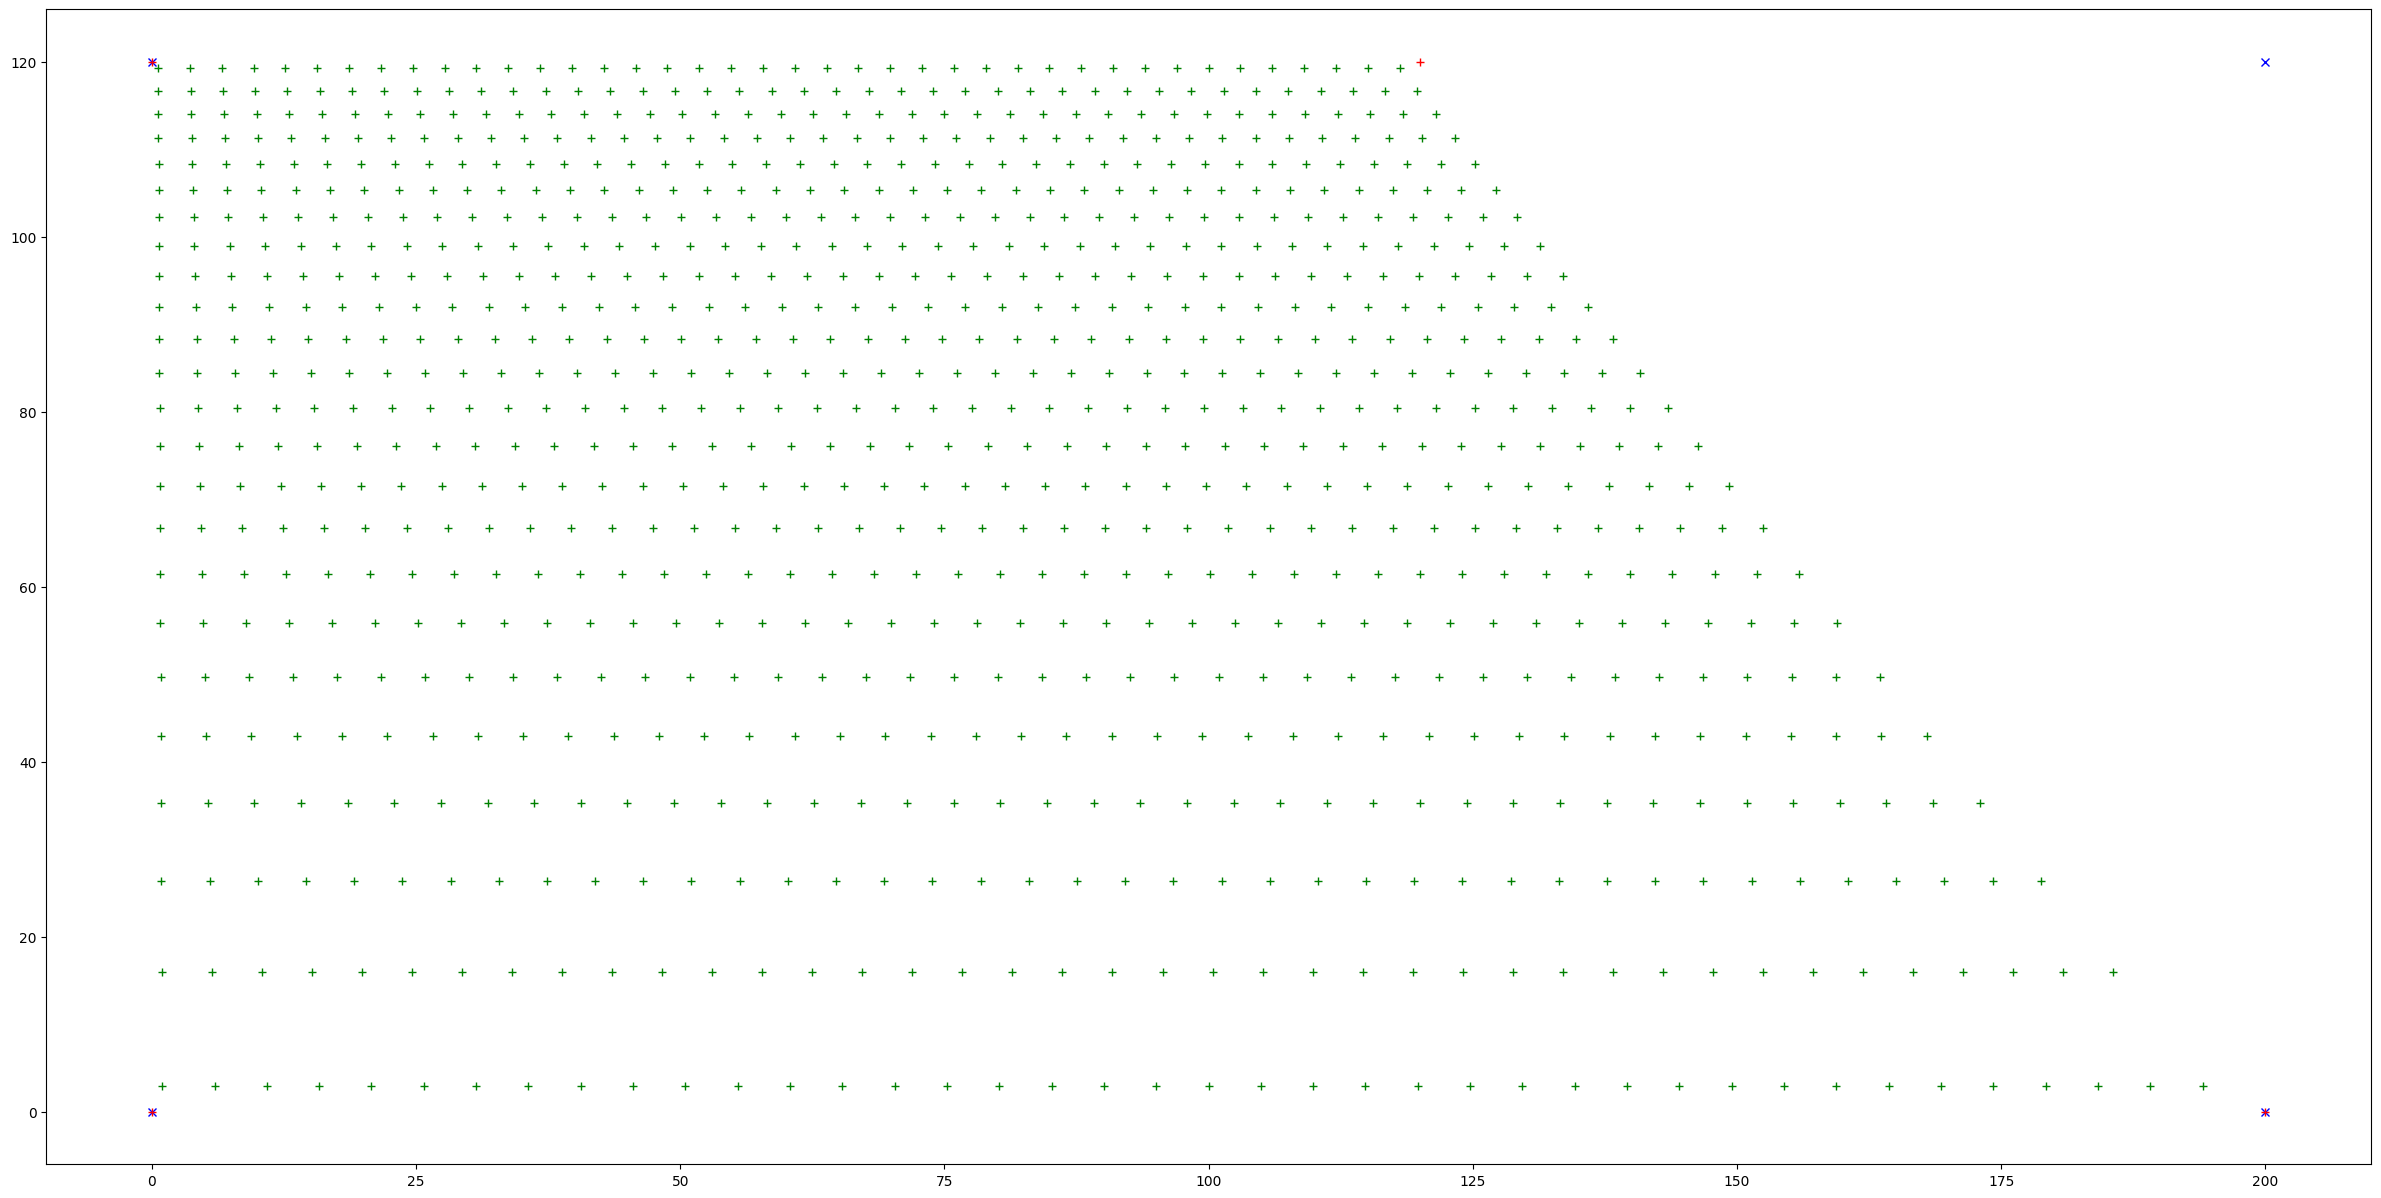

In [15]:
def find_point_rectified(p):
    x, y = p
    angle = find_angle(x, y)
    line_rectified = find_line_rectified(p)
    a, b = line_rectified
    #draw_line(yaffine(a, y, b), faffine(a, x, b))
    line_from = find_line_from(angle, p)
    point_rectified = find_intersection(line_from, line_rectified)
    return point_rectified, angle

def find_point_rectified2(p, mean):
    x, y = p
    angle = find_angle(x, y)
    line_rectified = find_line_rectified(p) 
    line_from = 0, mean
    #draw_line((-10, mean), (210, mean))
    point_rectified = find_intersection(line_from, line_rectified)
    return point_rectified, angle

def test_unrect():
    plt.plot([0, wr, 0, wr],[0, hr, hr, 0],"xb") # ob = type de points "o" ronds, "b" bleus
    plt.plot([0, wq, 0, wr],[0, hq, hr, 0],"+r") 

    X = []
    Y = []
    U = []
    V = []

    test = 0.0
    t = 0.0
    mean = 0
    for j in range (1, hr, 5):
        for i in range(1, wr, 5):
            v = []
            point_to_rectifiy = (i, j)
            new_point, angle = find_point_rectified(point_to_rectifiy)

            #plt.scatter(new_point[0], new_point[1], color='g', marker='+')
            
            v.append(new_point[1])
            
        mean = make_blue_line(v)
        
        for i in range(1, wr, 5):
            point_to_rectifiy = (i, j)
            new_point, angle = find_point_rectified2(point_to_rectifiy, mean)

            plt.plot([new_point[0]],[new_point[1]],"+g")
            #plt.plot([point_to_rectifiy[0]],[point_to_rectifiy[1]],"og")
                
            #l, m = find_vector(180 - (90+angle))
            #plt.quiver(point_to_rectifiy[0], point_to_rectifiy[1], l, m, scale_units = 'xy', scale=0.1, angles='uv', width=0.0021)
            #plt.text(point_to_rectifiy[0], point_to_rectifiy[1], str(angle), fontdict=font)
                

plt.figure(1, figsize=(30, 15))
test_unrect()
plt.show()

/var/folders/dv/thw7jrq56hxcn_nzxt880tyh0000gn/T/ipykernel_7711/3988511189.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  yl = np.sin(np.deg2rad(beta))/np.sin(np.deg2rad(angle))
/var/folders/dv/thw7jrq56hxcn_nzxt880tyh0000gn/T/ipykernel_7711/2542897521.py:7: RuntimeWarning: invalid value encountered in double_scalars
  b = ya - (a*xa)


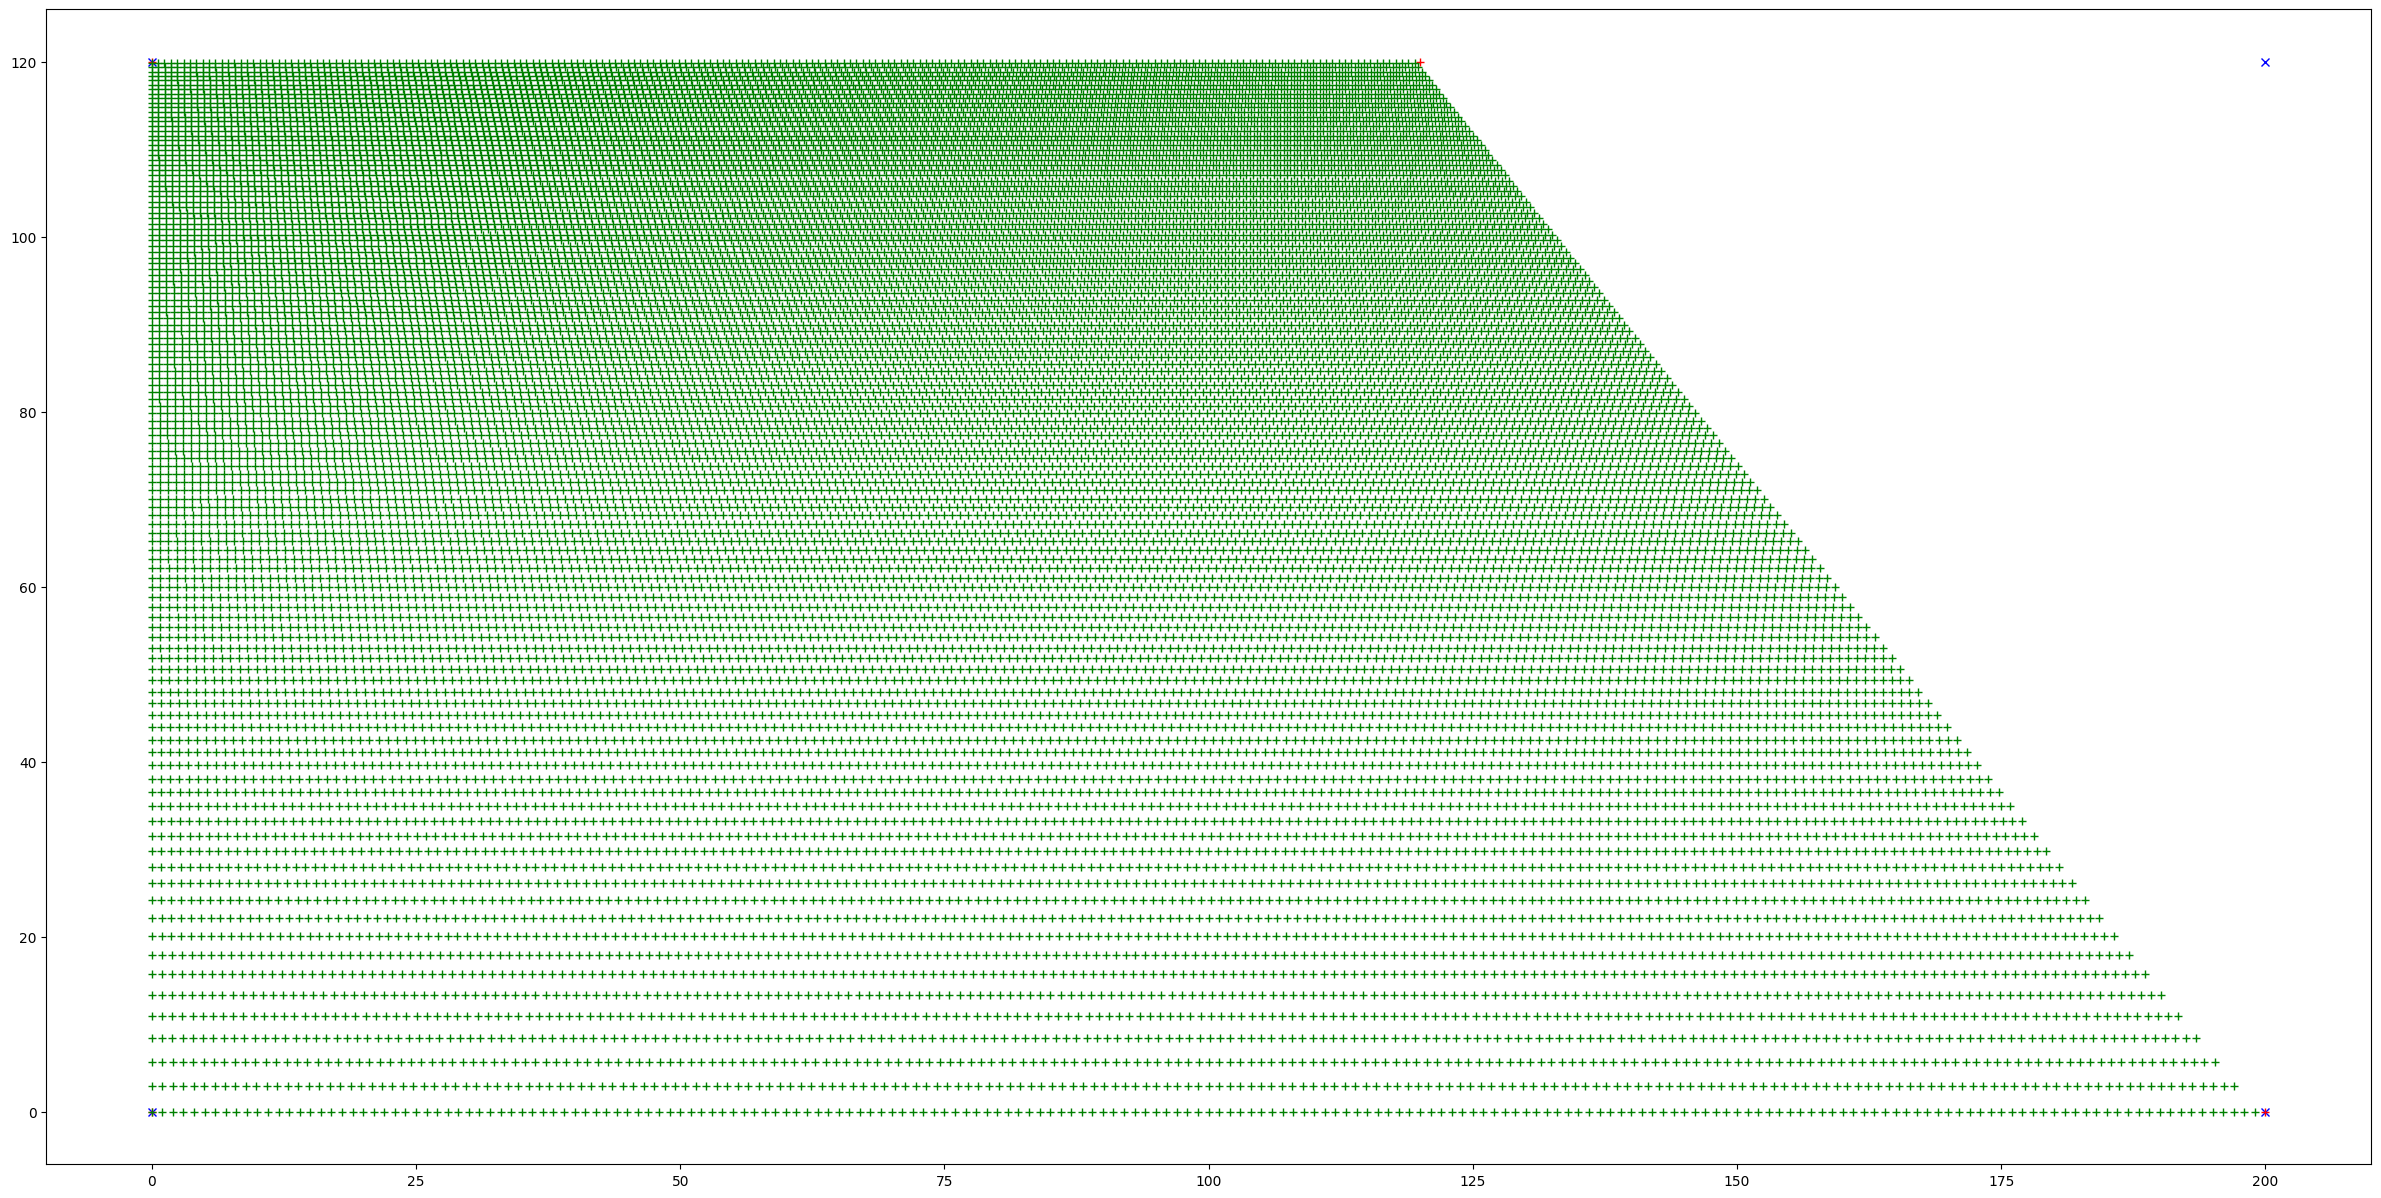

In [16]:
def test_unrect():
    plt.plot([0, wr, 0, wr],[0, hr, hr, 0],"xb") # ob = type de points "o" ronds, "b" bleus
    plt.plot([0, wq, 0, wr],[0, hq, hr, 0],"+r") 

    X = []
    Y = []
    U = []
    V = []

    test = 0.0
    t = 0.0
    mean = 0
    for j in range (hr):
        for i in range(wr):
            v = []
            point_to_rectifiy = (i, j)
            new_point, angle = find_point_rectified(point_to_rectifiy)

            #plt.scatter(new_point[0], new_point[1], color='g', marker='+')
            
            v.append(new_point[1])
            
        mean = make_blue_line(v)
        
        for i in range(wr):
            point_to_rectifiy = (i, j)
            new_point, angle = find_point_rectified2(point_to_rectifiy, mean)

            plt.plot([new_point[0]],[new_point[1]],"+g")
            #plt.plot([point_to_rectifiy[0]],[point_to_rectifiy[1]],"og")
                
            #l, m = find_vector(180 - (90+angle))
            #plt.quiver(point_to_rectifiy[0], point_to_rectifiy[1], l, m, scale_units = 'xy', scale=0.1, angles='uv', width=0.0021)
            #plt.text(point_to_rectifiy[0], point_to_rectifiy[1], str(angle), fontdict=font)
                

plt.figure(1, figsize=(30, 15))
test_unrect()
plt.show()

In [17]:
rect = 120, 200, 0, 0, 0, 0 # Straight image to rectify
quad = 110, 200, 0, 0, 0, 0 # Dimensions to rectify in

wr, hr, ar, br, cr, dr = rect
wq, hq, aq, bq, cq, dq = quad

/var/folders/dv/thw7jrq56hxcn_nzxt880tyh0000gn/T/ipykernel_7711/3988511189.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  yl = np.sin(np.deg2rad(beta))/np.sin(np.deg2rad(angle))
/var/folders/dv/thw7jrq56hxcn_nzxt880tyh0000gn/T/ipykernel_7711/2542897521.py:7: RuntimeWarning: invalid value encountered in double_scalars
  b = ya - (a*xa)


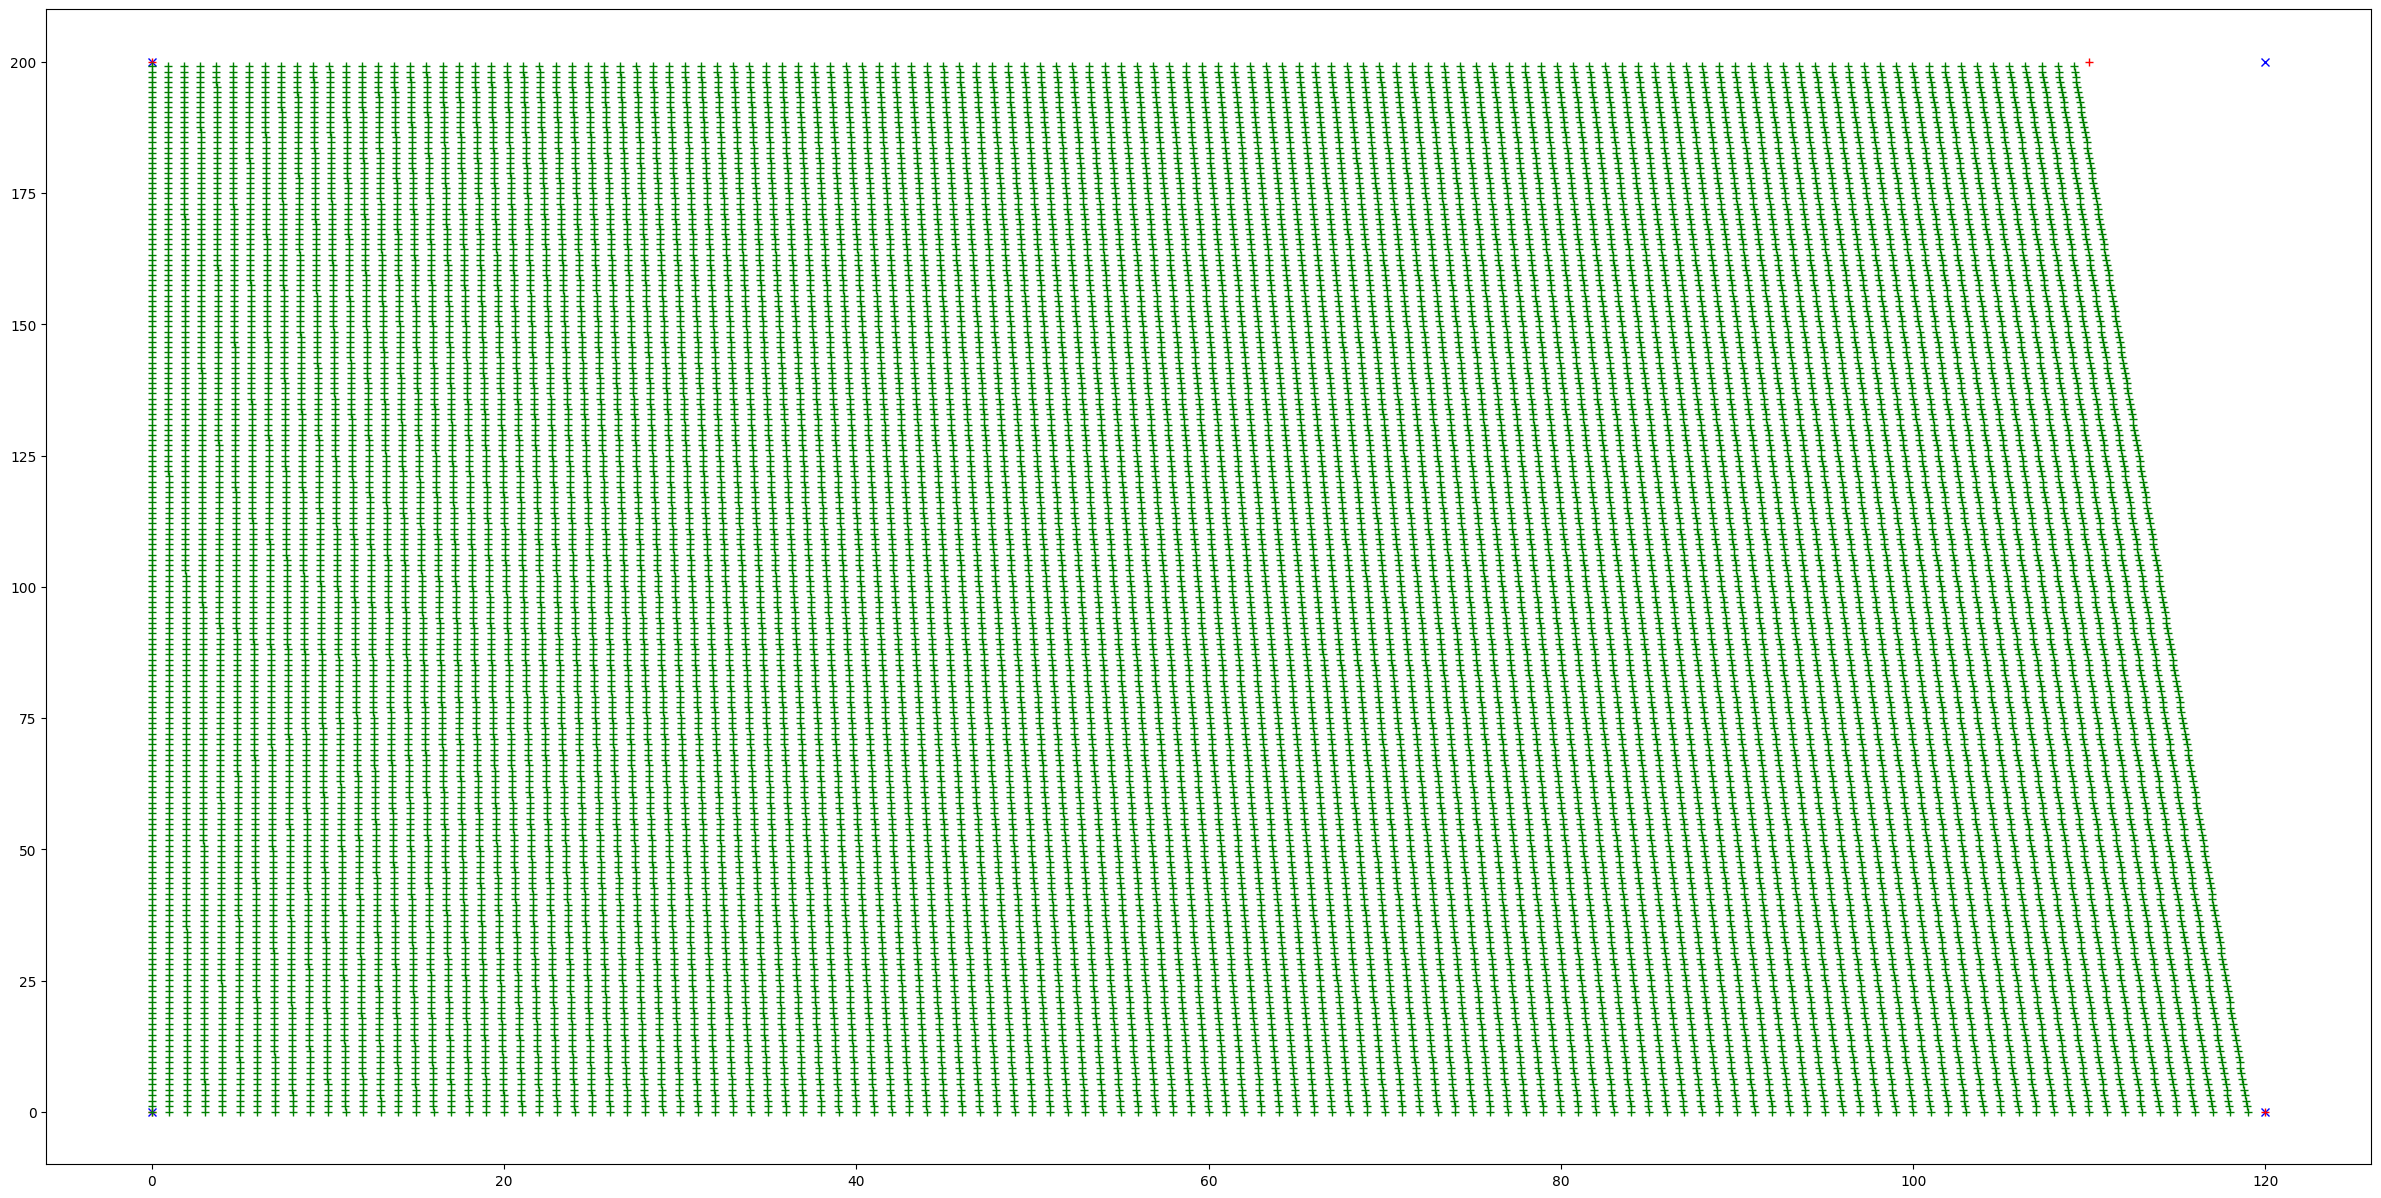

In [19]:
def test_unrect():
    plt.plot([0, wr, 0, wr],[0, hr, hr, 0],"xb") # ob = type de points "o" ronds, "b" bleus
    plt.plot([0, wq, 0, wr],[0, hq, hr, 0],"+r") 

    X = []
    Y = []
    U = []
    V = []

    test = 0.0
    t = 0.0
    mean = 0
    for j in range(hr):
        for i in range(wr):
            v = []
            point_to_rectifiy = (i, j)
            new_point, angle = find_point_rectified(point_to_rectifiy)

            #plt.scatter(new_point[0], new_point[1], color='g', marker='+')
            
            v.append(new_point[1])
            
        mean = make_blue_line(v)
        
        for i in range(wr):
            point_to_rectifiy = (i, j)
            new_point, angle = find_point_rectified2(point_to_rectifiy, mean)

            plt.plot([new_point[0]],[new_point[1]],"+g")
            #plt.plot([point_to_rectifiy[0]],[point_to_rectifiy[1]],"og")
                
            #l, m = find_vector(180 - (90+angle))
            #plt.quiver(point_to_rectifiy[0], point_to_rectifiy[1], l, m, scale_units = 'xy', scale=0.1, angles='uv', width=0.0021)
            #plt.text(point_to_rectifiy[0], point_to_rectifiy[1], str(angle), fontdict=font)
                

#fig, ax = plt.subplot(1, figsize=(30, 15))
#ax.set_aspect('equal', 'box')
plt.figure(1, figsize=(30, 15))
test_unrect()
plt.show()